# Graficos

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("graficos.xlsx", encoding = 'latin-1', sep=';', index_col=0)
df.columns
df2 = pd.read_csv("graficos.csv", encoding = 'latin-1', sep=';')
df3 = pd.read_csv("graficos2.csv", encoding = 'latin-1', sep=';')

In [93]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
flights.head()

year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April      461  
May        472

In [94]:
df3.columns

Index(['Año', 'Altas (10^6)'], dtype='object')

In [95]:
df3['Altas (10^6)'] = df3['Altas (10^6)'].str.replace(',', ".").astype(float)
df2['Medicos (10^4)'] = df2['Medicos (10^4)'].str.replace(',', ".").astype(float)


In [96]:
df3.columns

Index(['Año', 'Altas (10^6)'], dtype='object')

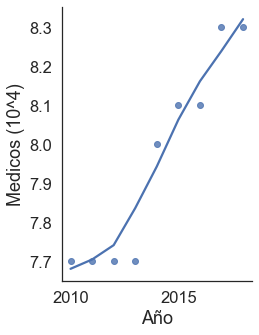

In [104]:
color = (sns.dark_palette("purple"))
sns.set()
sns.set(font_scale=1.5,style="white")
lm = sns.lmplot(x="Año",y='Medicos (10^4)',data=df2, lowess=True,height=5, aspect=.8,sharex=False,sharey=False)
axes = lm.axes
plt.show()

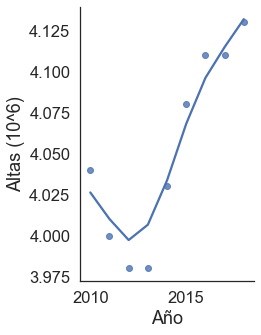

In [99]:
color = (sns.dark_palette("purple"))
sns.set()
sns.set(font_scale=1.5,style="white")
sns.lmplot(x="Año",y='Altas (10^6)',data=df3, lowess=True,height=5, aspect=.8)
plt.show()

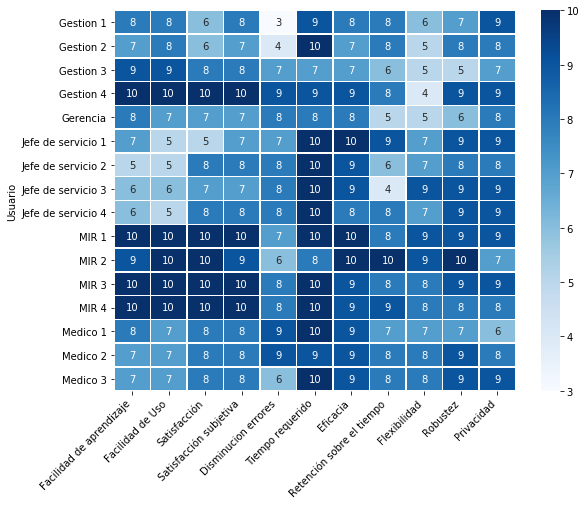

In [6]:

f, ax = plt.subplots(figsize=(9, 7))
g = sns.heatmap(df, annot=True, fmt="d", linewidths=.5, ax=ax,cmap='Blues')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('svm_conf.png', dpi=1000,bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

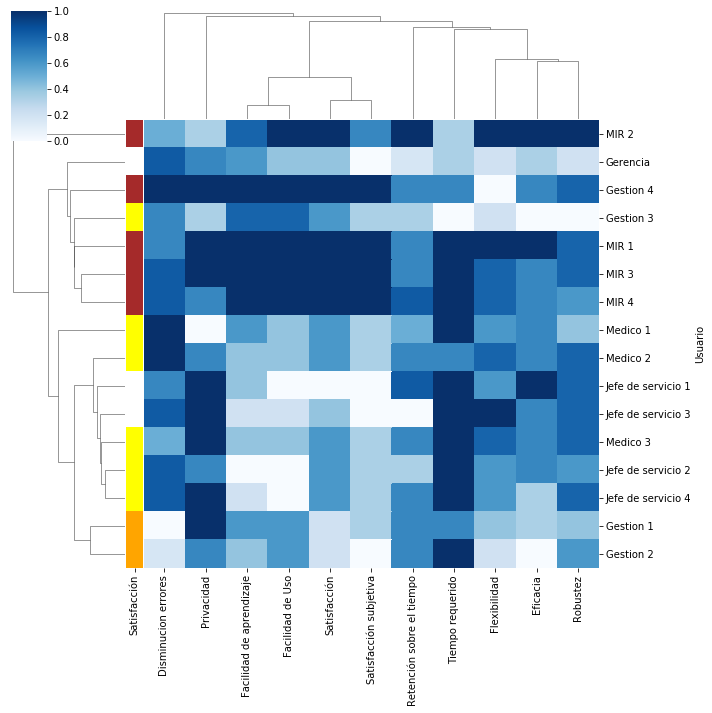

In [22]:

plt.figure(figsize=(6,4))

# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.Satisfacción.unique(), ["orange","yellow","brown"]))
row_colors = df.Satisfacción.map(my_palette)
 
# plot
sns.clustermap(df,metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)


#sns.clustermap(df,cmap='RdYlBu',linewidths=0.5,figsize=(8,8),annot=True,fmt='d')




plt.savefig('svm_hc.png', dpi=1000,bbox_inches="tight")

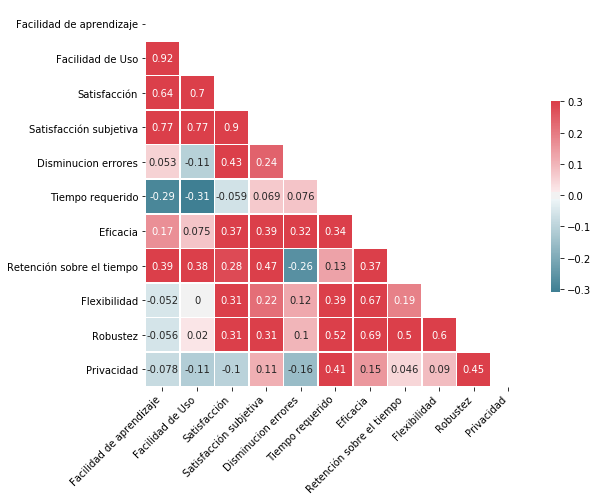

In [7]:
# Compute the correlation matrix
corr = df.corr()
import numpy as np
import matplotlib.pyplot as plt
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g =sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('corr_conf.png', dpi=1000,bbox_inches="tight")